In [ ]:
!pip install matplotlib

Test AUTOENCODER

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import random


In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


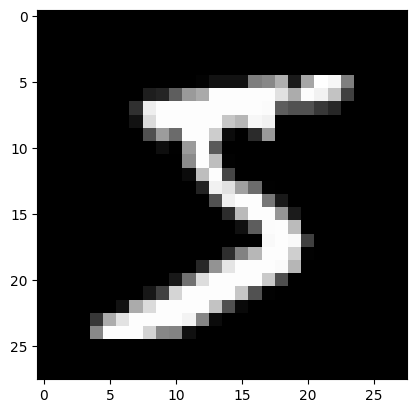

In [3]:
plt.imshow(x_train[0],cmap="gray")

In [4]:
x__test=x_test/255
x_train=x_train/255

In [5]:
encoder_input=keras.Input(shape=(28,28,1),name="img")
x=keras.layers.Flatten()(encoder_input)
encoder_out=keras.layers.Dense(64,activation="relu")(x)
encoder=keras.Model(encoder_input,encoder_out,name="encoder")

decoder_input=keras.layers.Dense(784,activation="relu")(encoder_out)
decoder_output=keras.layers.Reshape((28,28,1))(decoder_input)

opt=keras.optimizers.legacy.Adam(lr=0.001,decay=1e-6)

Autoencoder=keras.Model(encoder_input,decoder_output,name="autoencoder")
Autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
Autoencoder.compile(opt,loss="mse")
Autoencoder.fit(x_train,x_train,epochs=3,batch_size=32,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0172 - val_loss: 0.0115
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 3/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0106 - val_loss: 0.0104


In [12]:
example=encoder.predict(x_train[3].reshape(-1,28,28,1))

1/1 [==============================] - 0s 21ms/step


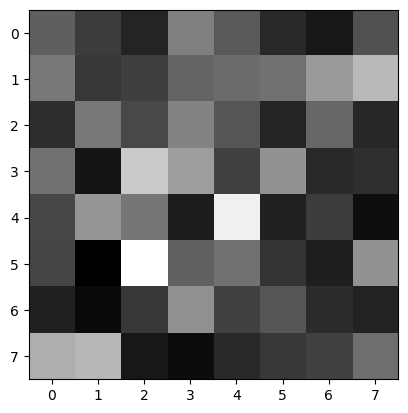

In [13]:
plt.imshow(example.reshape(8,8),cmap="gray")

In [14]:
Eout=Autoencoder.predict(x_test[3].reshape(-1,28,28,1))

1/1 [==============================] - 0s 21ms/step


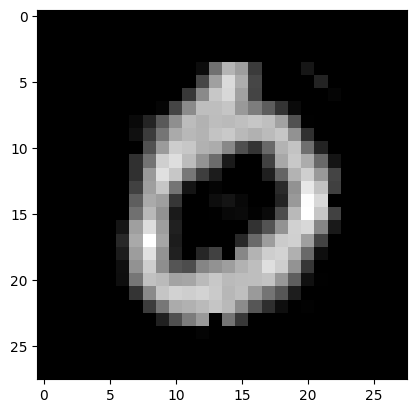

In [15]:
plt.imshow(Eout.reshape(28,28),cmap="gray")

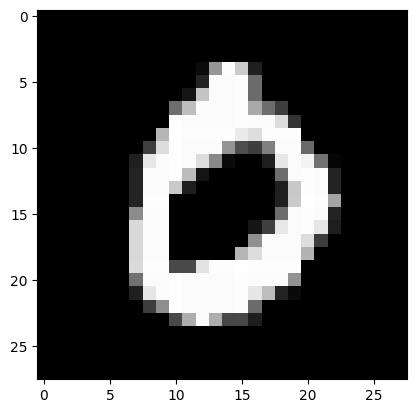

In [16]:
plt.imshow(x_test[3],cmap="gray")

In [19]:
def remove_values(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance:
                new_val = 0  # changing this to be 0
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance:
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)


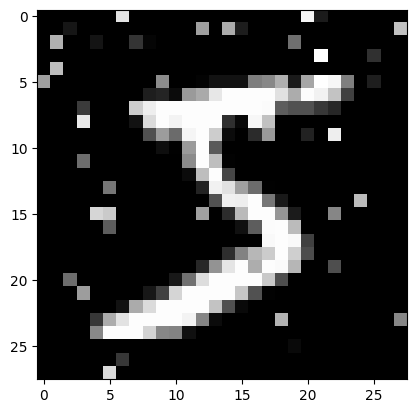

In [23]:
noisy = add_noise(x_train[0])
plt.imshow(noisy, cmap="gray")

1/1 [==============================] - 0s 73ms/step


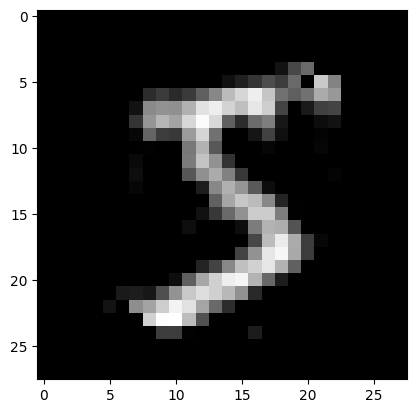

In [26]:
OutNoisy=Autoencoder.predict(noisy.reshape(-1,28,28,1))
plt.imshow(OutNoisy.reshape(28,28),cmap="gray")